In [1]:
#importing necessary libraries and frameworks
import tensorflow as tf
import torch
import os 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from keras.datasets import cifar10
import seaborn as sns

import keras
from tensorflow.keras import layers
from keras.utils import to_categorical

# plot the confusion matrix for the testing dataset
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np



2024-03-02 04:54:19.795463: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-02 04:54:19.795574: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-02 04:54:19.943944: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
#loading the dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print(f"X train shape: {X_train.shape}")
print(f"y train shape: {y_train.shape}")
print(f"X test shape: {X_test.shape}")
print(f"y test shape: {y_test.shape}")

170498071/170498071 [==============================] - 4s 0us/step
X train shape: (50000, 32, 32, 3)
y train shape: (50000, 1)
X test shape: (10000, 32, 32, 3)
y test shape: (10000, 1)


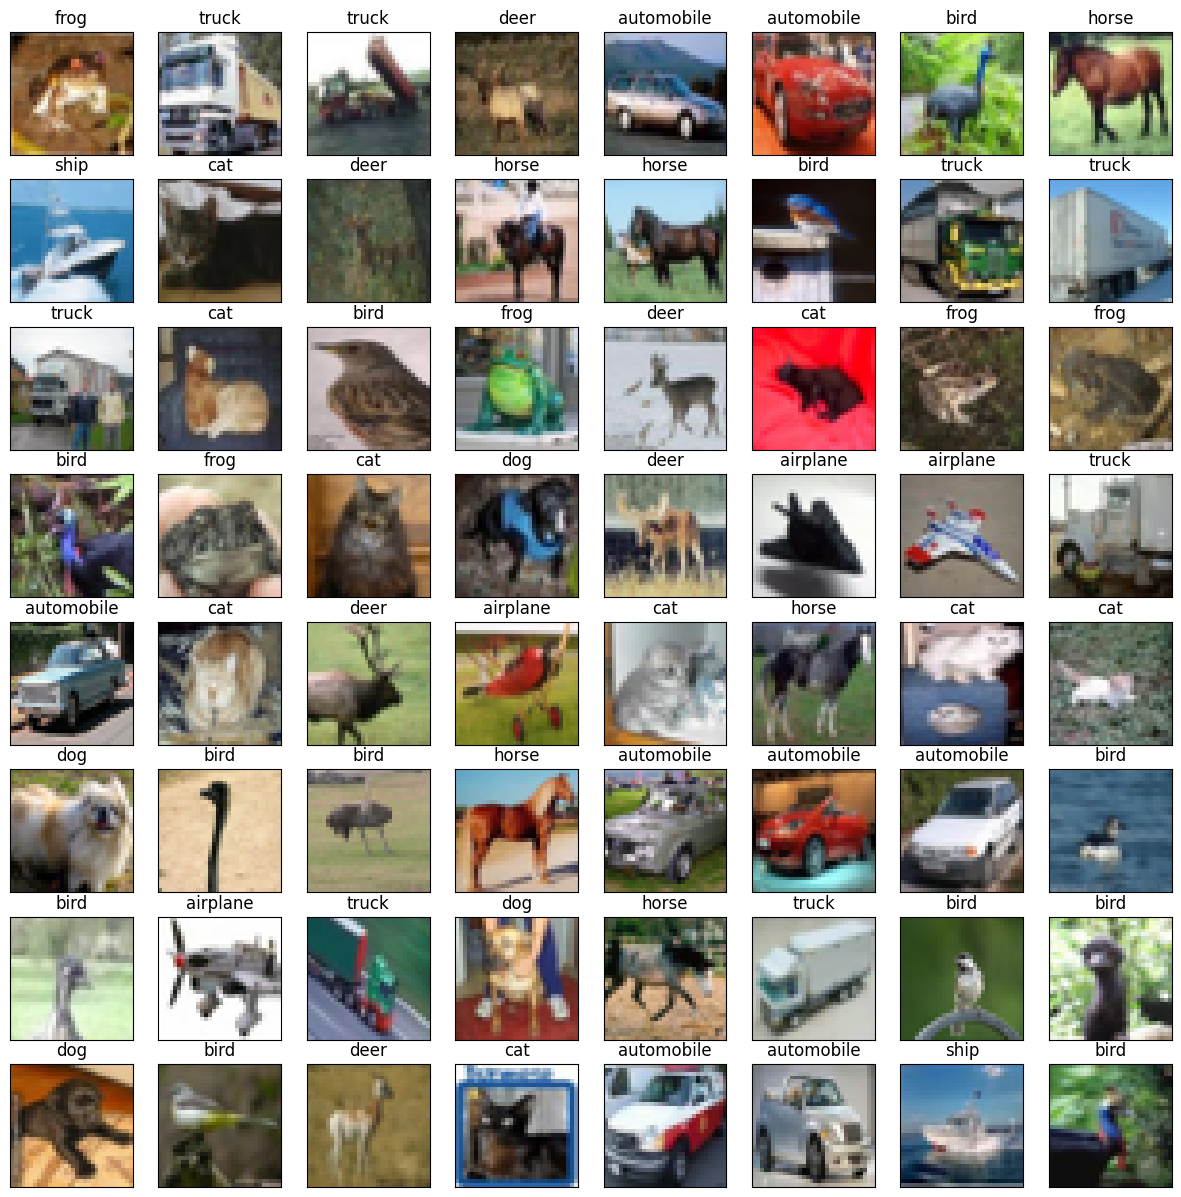

In [3]:
# displaying the sample image from each class:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
               
# create a new figure
plt.figure(figsize=(15,15))

#displaying 64 images 
for i in range(64):
    # Create a subplot for each image
    plt.subplot(8, 8, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    # Display the image
    plt.imshow(X_train[i])

    # Set the label as the title
    plt.title(class_names[y_train[i][0]], fontsize=12)

# Display the figure
plt.show()

# Data Preprocessing

### Flattening, and Normalising the Images

3072 = 32 * 32 * 3

In [4]:
X_train = X_train.reshape(50000, 3072)
X_test = X_test.reshape(10000, 3072)

In [5]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [6]:
# normalizing the data to help with the training
X_train /= 255
X_test /= 255

### One-hot encoding the labels for training and testing

In [7]:
n_classes = 10
Y_train = keras.utils.to_categorical(y_train, n_classes)
Y_test = keras.utils.to_categorical(y_test, n_classes)

print(f"Shape before one-hot encoding: {y_train.shape}; e.g. {y_train[0]}")
print(f"Shape after one-hot encoding: {Y_train.shape}; e.g. {Y_train[0]}")

Shape before one-hot encoding: (50000, 1); e.g. [6]
Shape after one-hot encoding: (50000, 10); e.g. [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


# Model Creationg using Tensorflow

In [8]:
from keras.layers import LeakyReLU
model = keras.Sequential([
    layers.Dense(1024, activation=keras.layers.LeakyReLU(alpha=0.1), input_shape=(3072,)),
    layers.Dense(512, activation=keras.layers.LeakyReLU(alpha=0.1)),
    #layers.Dense(256, activation=keras.layers.LeakyReLU(alpha=0.1)),
    layers.Dense(175, activation=keras.layers.LeakyReLU(alpha=0.1)),
    #layers.Dense(64, activation=keras.layers.LeakyReLU(alpha=0.1)),
    layers.Dense(10, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              3146752   
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 175)               89775     
                                                                 
 dense_3 (Dense)             (None, 10)                1760      
                                                                 
Total params: 3763087 (14.36 MB)
Trainable params: 3763087 (14.36 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


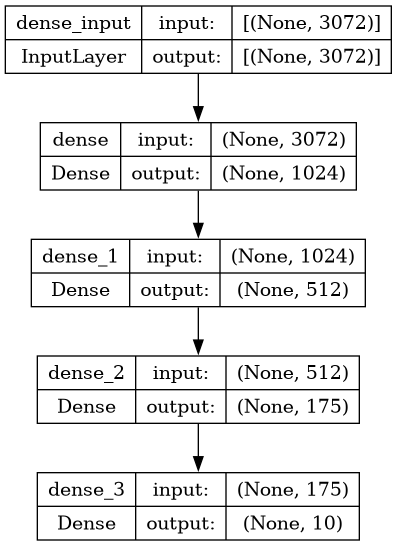

In [9]:
keras.utils.plot_model(model, show_shapes=True)

In [10]:
#Compiling the model
model.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics = ['accuracy'])

In [11]:
history = model.fit(X_train, Y_train, batch_size=100, epochs=30)

Epoch 1/30
500/500 [==============================] - 9s 18ms/step - loss: 1.9449 - accuracy: 0.3018
Epoch 2/30
500/500 [==============================] - 9s 17ms/step - loss: 1.7649 - accuracy: 0.3785
Epoch 3/30
500/500 [==============================] - 9s 17ms/step - loss: 1.6885 - accuracy: 0.4052
Epoch 4/30
500/500 [==============================] - 9s 18ms/step - loss: 1.6318 - accuracy: 0.4259
Epoch 5/30
500/500 [==============================] - 9s 17ms/step - loss: 1.5921 - accuracy: 0.4425
Epoch 6/30
500/500 [==============================] - 9s 17ms/step - loss: 1.5548 - accuracy: 0.4537
Epoch 7/30
500/500 [==============================] - 9s 18ms/step - loss: 1.5245 - accuracy: 0.4642
Epoch 8/30
500/500 [==============================] - 9s 17ms/step - loss: 1.4982 - accuracy: 0.4742
Epoch 9/30
500/500 [==============================] - 9s 17ms/step - loss: 1.4722 - accuracy: 0.4831
Epoch 10/30
500/500 [==============================] - 9s 17ms/step - loss: 1.4511 - accura

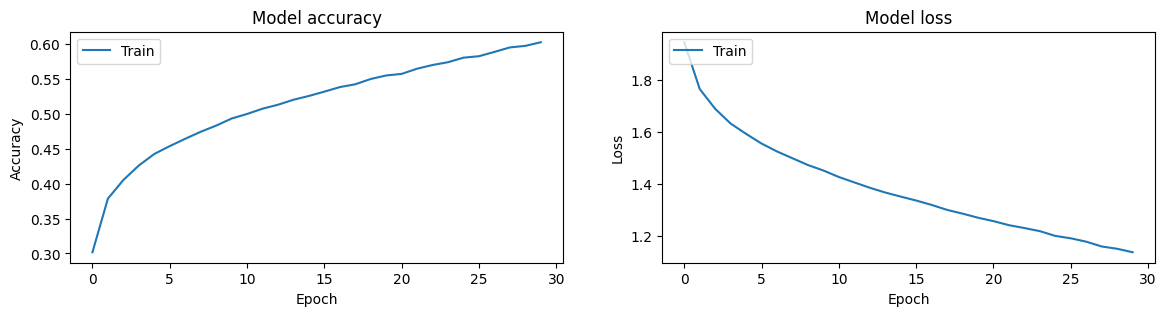

In [12]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(14,3))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')

plt.show()

In [13]:
test_loss_digit, test_acc_digit = model.evaluate(X_test, Y_test)

313/313 [==============================] - 2s 6ms/step - loss: 1.4646 - accuracy: 0.4821


In [14]:
print("Testing Accuracy : ", round(test_acc_digit,4)*100, "%")

Testing Accuracy :  48.209999999999994 %


313/313 [==============================] - 2s 5ms/step


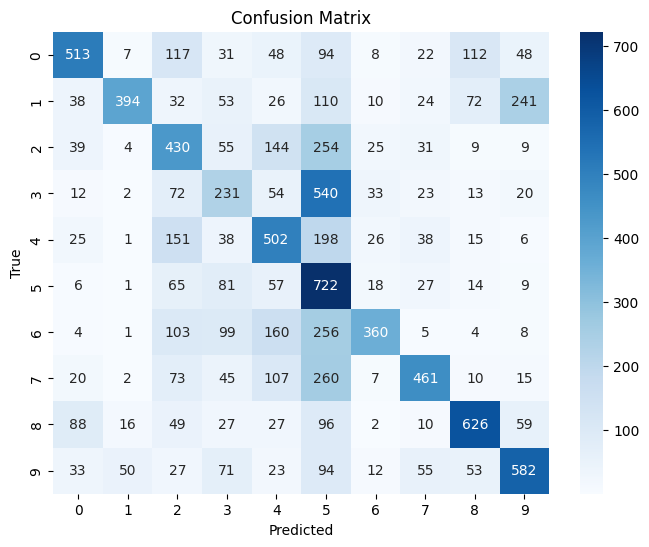

In [15]:
y_pred = model.predict(X_test)

# Convert the predictions and true labels to classes (assuming one-hot encoding for true labels)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(Y_test, axis=1)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=range(10),
    yticklabels=range(10),
)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

Random sample taken is 4596


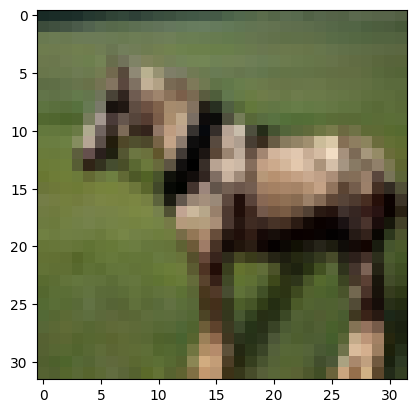

Actual class :  7
1/1 [==============================] - 0s 15ms/step
Predicted class :  4


In [16]:
# take one random sample from test and show the predicted vs actual
import random

i = random.randint(1, 10000)
print("Random sample taken is", i)
plt.imshow(X_test[i].reshape(32, 32, 3))
plt.show()
print("Actual class : ", Y_test[i].argmax())
print("Predicted class : ", model.predict(X_test[i].reshape(1, 3072)).argmax())

In [17]:
from keras.layers import LeakyReLU
model = keras.Sequential([
    layers.Dense(2048, activation=keras.layers.LeakyReLU(alpha=0.1), input_shape=(3072,)),
    layers.Dense(1024, activation=keras.layers.LeakyReLU(alpha=0.1)),
    layers.Dense(512, activation=keras.layers.LeakyReLU(alpha=0.1)),
    layers.Dense(256, activation=keras.layers.LeakyReLU(alpha=0.1)),
    layers.Dense(175, activation=keras.layers.LeakyReLU(alpha=0.1)),
    layers.Dense(64, activation=keras.layers.LeakyReLU(alpha=0.1)),
    layers.Dense(10, activation='sigmoid')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 2048)              6293504   
                                                                 
 dense_5 (Dense)             (None, 1024)              2098176   
                                                                 
 dense_6 (Dense)             (None, 512)               524800    
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 dense_8 (Dense)             (None, 175)               44975     
                                                                 
 dense_9 (Dense)             (None, 64)                11264     
                                                                 
 dense_10 (Dense)            (None, 10)               

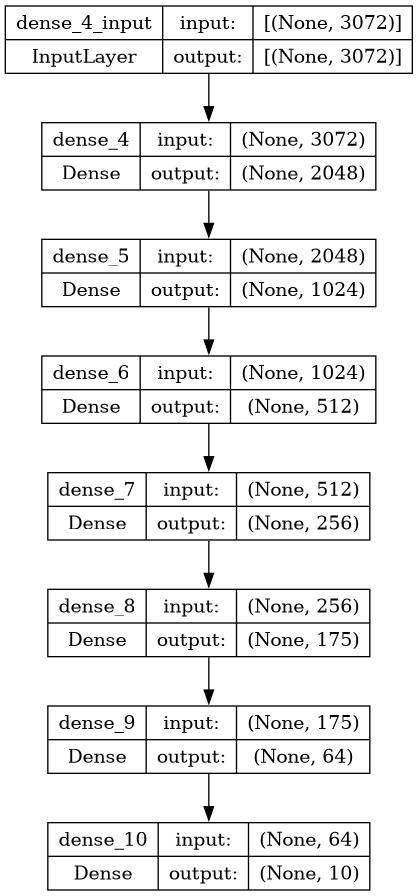

In [18]:
keras.utils.plot_model(model, show_shapes=True)

In [19]:
#Compiling the model
model.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics = ['accuracy'])

In [20]:
history = model.fit(X_train, Y_train, batch_size=100, epochs=30)

Epoch 1/30
500/500 [==============================] - 24s 47ms/step - loss: 2.0068 - accuracy: 0.2727
Epoch 2/30
500/500 [==============================] - 23s 47ms/step - loss: 1.7859 - accuracy: 0.3617
Epoch 3/30
500/500 [==============================] - 24s 48ms/step - loss: 1.6944 - accuracy: 0.3955
Epoch 4/30
500/500 [==============================] - 24s 47ms/step - loss: 1.6279 - accuracy: 0.4199
Epoch 5/30
500/500 [==============================] - 24s 47ms/step - loss: 1.5796 - accuracy: 0.4388
Epoch 6/30
500/500 [==============================] - 24s 47ms/step - loss: 1.5363 - accuracy: 0.4546
Epoch 7/30
500/500 [==============================] - 24s 47ms/step - loss: 1.5003 - accuracy: 0.4671
Epoch 8/30
500/500 [==============================] - 23s 46ms/step - loss: 1.4616 - accuracy: 0.4800
Epoch 9/30
500/500 [==============================] - 23s 47ms/step - loss: 1.4300 - accuracy: 0.4933
Epoch 10/30
500/500 [==============================] - 24s 47ms/step - loss: 1.403

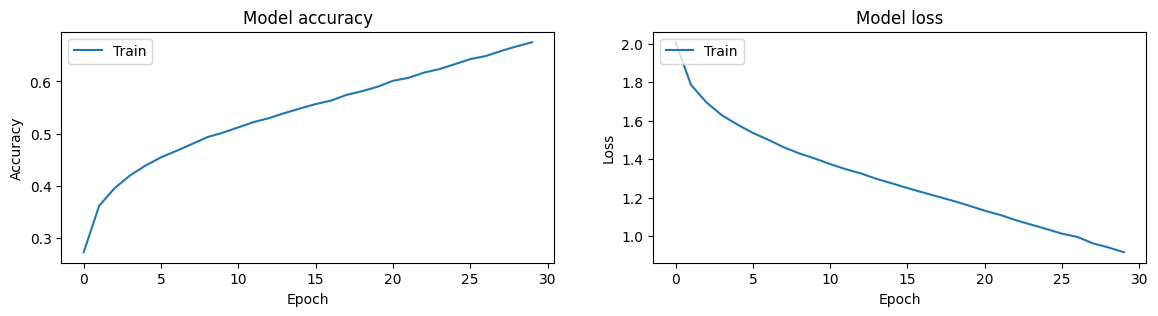

In [21]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(14,3))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')

plt.show()

In [22]:
test_loss_digit, test_acc_digit = model.evaluate(X_test, Y_test)

313/313 [==============================] - 3s 10ms/step - loss: 1.2847 - accuracy: 0.5515


In [23]:
print("Testing Accuracy : ", round(test_acc_digit,4)*100, "%")

Testing Accuracy :  55.15 %


313/313 [==============================] - 3s 9ms/step


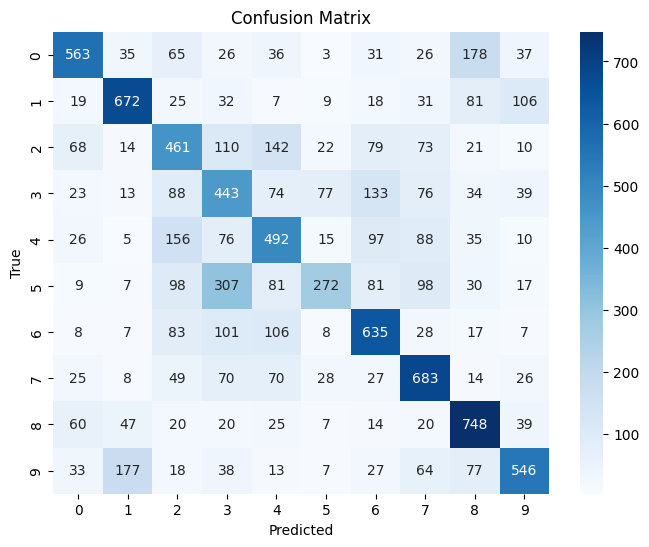

In [24]:
y_pred = model.predict(X_test)

# Convert the predictions and true labels to classes (assuming one-hot encoding for true labels)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(Y_test, axis=1)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=range(10),
    yticklabels=range(10),
)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

Random sample taken is 736


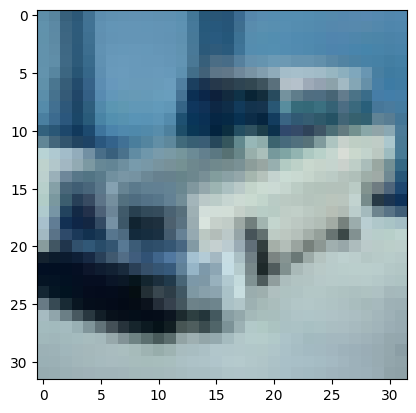

Actual class :  1
1/1 [==============================] - 0s 19ms/step
Predicted class :  1


In [25]:
# take one random sample from test and show the predicted vs actual
import random

i = random.randint(1, 10000)
print("Random sample taken is", i)
plt.imshow(X_test[i].reshape(32, 32, 3))
plt.show()
print("Actual class : ", Y_test[i].argmax())
print("Predicted class : ", model.predict(X_test[i].reshape(1, 3072)).argmax())

Keras is a highlevel API
AZURE ML -> 0 codin

Tensorflow, Mxnet Theano Torch are all libraries


In an ANN
weights are used to give strength to the signal, 
initialising 0 , or random , or He-et al initialisation for RELU activation function 
